In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
suv_data = pd.read_csv('suv_data.csv')
suv_data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [2]:
print('No. data points:', (len(suv_data.index)))

No. data points: 400


<AxesSubplot:xlabel='Purchased', ylabel='count'>

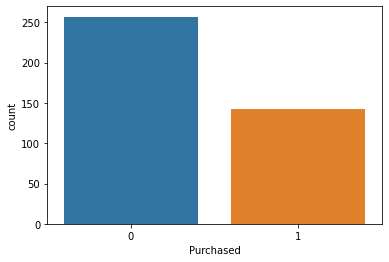

In [3]:
sns.countplot(x = 'Purchased', data = suv_data)

<AxesSubplot:xlabel='Purchased', ylabel='count'>

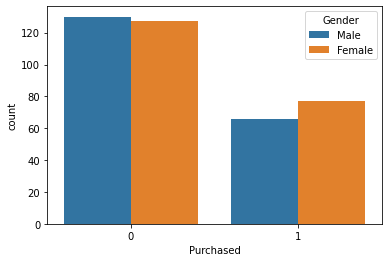

In [4]:
sns.countplot(x ='Purchased', hue ='Gender' ,data = suv_data)

Gender has little to non effect on the prediction

In [5]:
suv_data.isnull().sum()


User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<AxesSubplot:xlabel='Purchased', ylabel='EstimatedSalary'>

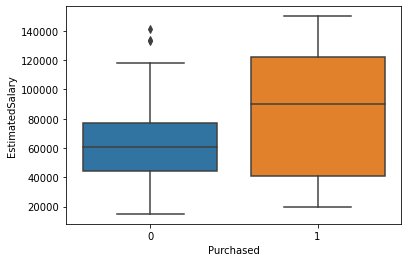

In [6]:
sns.boxplot(x = 'Purchased', y ='EstimatedSalary', data = suv_data)

EstimatedSalary have some effect on prediction

<AxesSubplot:xlabel='Purchased', ylabel='Age'>

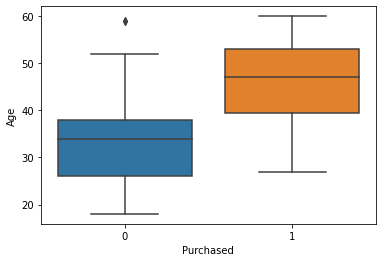

In [7]:
sns.boxplot(x = 'Purchased', y ='Age', data = suv_data)

Age has a big effect on prediction

In [8]:
sex = pd.get_dummies(suv_data['Gender'],drop_first=True)
sex.head(5)

,Male
0,1
1,1
2,0
3,0
4,1


In [9]:
suv_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [10]:
suv_data = pd.concat([suv_data, sex],axis = 1)

suv_data.head()


,User ID,Gender,Age,EstimatedSalary,Purchased,Male
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1


In [11]:
suv_data.drop(['Gender'],axis = 1,inplace= True)
suv_data.head()

,User ID,Age,EstimatedSalary,Purchased,Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1


## Creating new var to improve algorithm
Since Age and Salary is important in the prediction, adding a new
val that is Salart * Age give an improvment from 69% to 78%

In [12]:
suv_data['AgeTimeInc'] = suv_data.apply(lambda row: row.EstimatedSalary * row.Age, axis = 1)

<AxesSubplot:xlabel='Purchased', ylabel='AgeTimeInc'>

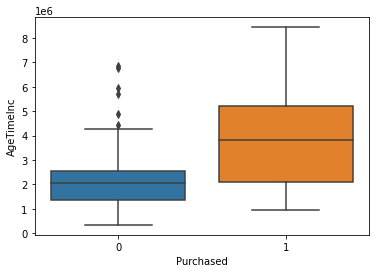

In [13]:
sns.boxplot(x = 'Purchased', y ='AgeTimeInc', data = suv_data)

Tried to clean the data, didn't help

In [14]:

suv_data['test'] = suv_data.apply(lambda row: 1 if row.EstimatedSalary>60000  else 0, axis = 1)
suv_data.head()

,User ID,Age,EstimatedSalary,Purchased,Male,AgeTimeInc,test
0,15624510,19,19000,0,1,361000,0
1,15810944,35,20000,0,1,700000,0
2,15668575,26,43000,0,0,1118000,0
3,15603246,27,57000,0,0,1539000,0
4,15804002,19,76000,0,1,1444000,1


In [15]:
#Cleaning the data 
lower_limit, upper_limit = suv_data.AgeTimeInc.quantile([0.0,0.85])
lower_limit, upper_limit

(336000.0, 4372799.999999999)

In [16]:
# df2 = suv_data[(suv_data.AgeTimeInc>lower_limit)&(suv_data.AgeTimeInc<upper_limit)&(suv_data.Purchased==0)||(suv_data.AgeTimeInc>lower_limit)&(suv_data.AgeTimeInc<upper_limit)]  #Creating a new datafram without outliers
# sns.boxplot(x = 'Purchased', y ='AgeTimeInc', data = df2)

In [17]:
#independant variable
X = suv_data.drop('Purchased',axis = 1)  #lager kopi av datasettet, uten informasjon om kjøp
#X2 = df2.drop('Purchased',axis = 1)
#dependant variable
y = suv_data['Purchased'] #Legger kjøp i egen variabel
# y2= df2['Purchased']

In [18]:
import sklearn
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [20]:
from sklearn.linear_model import LogisticRegression

In [41]:
logmodel = LogisticRegression(solver="newton-cg", max_iter=25000, dual=False)

In [42]:
logmodel.fit(X_train, y_train)

D:\Programering\Programmer\Anaconda\envs\dave3625\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\Programering\Programmer\Anaconda\envs\dave3625\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\Programering\Programmer\Anaconda\envs\dave3625\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\Programering\Programmer\Anaconda\envs\dave3625\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\Programering\Programmer\Anaconda\envs\dave3625\lib\si

LogisticRegression(max_iter=25000, solver='newton-cg')

In [34]:
predictions = logmodel.predict(X_test)

In [35]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.84      0.87        58
           1       0.80      0.86      0.83        42

    accuracy                           0.85       100
   macro avg       0.85      0.85      0.85       100
weighted avg       0.85      0.85      0.85       100



In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix


conf = multilabel_confusion_matrix(y_test, predictions)

In [38]:
confusion_matrix(y_test, predictions)

array([[49,  9],
       [ 6, 36]], dtype=int64)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(y_test, predictions)

0.85

In [ ]:
for i, matrix in enumerate(conf):
    tick_labels = ['Purchased', 'EstimatedSalary' ]
    plt.figure()
    sns.heatmap(matrix, annot=True, fmt='d',
                xticklabels=tick_labels,
                yticklabels=tick_labels)
    plt.xticks(rotation=0)